<div style="background-color: yellow; padding: 18px;">
    <h1> Data Science Challenge |  Data & Analytics Team
</div>

<div style="background-color: lightblue; padding: 10px;">
    <h2> Case 3 - Previsión de falla
</div>
    

**Descripción**
 
Los galpones de Full de mercado libre cuentan con una flota de dispositivos que transmiten diariamente telemetría agregada en varios atributos.

Las técnicas de mantenimiento predictivo están diseñadas para ayudar a determinar la condición del equipo de mantenimiento en servicio para predecir cuándo se debe realizar el mantenimiento. Este enfoque promete ahorros de costos sobre el mantenimiento preventivo de rutina o basado en el tiempo porque las tareas se realizan solo cuando están justificadas.
   
Tiene la tarea de generar una Jupyter notebook con un modelo predictivo para predecir la probabilidad de falla del dispositivo con el objetivo de bajar los costos del proceso. Como una referencia, una falla de un dispositivo tiene un costo de 1 mientras el costo de un mantenimiento es 0,5. El archivo "full_devices.csv" tiene los valores diários para los 9 atributos de los dispositivos y la columna que está tratando de predecir se llama 'failure' con el valor binario 0 para no fallar y 1 para fallar.
    
___

# Estratégia adotada:

- Analisar os dados para definir estratégia de implementação
- Pré processamento de dados
    - Feature Engineering e preparação dos dados
- Criar modelos
- Avaliar os modelos
- Balancear classes
    - Resampling 
- Otimizar os modelos
- Conclusão


## Carregar, analisar e limpar os dados

In [1]:
# Importando as bibliotecas necessárias

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

# import plotly.express as px
# from plotly.offline import init_notebook_mode, iplot

from sklearn.metrics import (ConfusionMatrixDisplay, classification_report, precision_recall_curve, 
                             PrecisionRecallDisplay, RocCurveDisplay,
                             recall_score, make_scorer, roc_auc_score)

In [2]:
# Carregando base de dados
df = pd.read_csv("files/full_devices.csv", encoding="latin1")

In [3]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [5]:
# Analisar basicamente algumas estatísticas das features numéricas
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


Os atributos tem escalas diferentes. Se usarmos modelos baseados em distância, será necessário normalizar/padronizar os atributos

In [6]:
# Analisar basicamente algumas estatísticas das features categóricas
df.describe(include='O')

,date,device
count,124494,124494
unique,304,1169
top,2015-01-01,Z1F0QLC1
freq,1163,304


In [7]:
# tirar duplicados # 1 registro
df = df.drop_duplicates()

In [8]:
# verificar se tem dados faltantes
df.isna().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [9]:
# Período de tempo
df.date.min(), df.date.max()

('2015-01-01', '2015-11-02')

In [10]:
# target - falha
df.failure.value_counts(dropna=False)

failure
0    124387
1       106
Name: count, dtype: int64

In [11]:
print(f"Dados referentes ao período de tempo entre {df.date.min()} e {df.date.max()}")

print(f"{len(df)} resgistros de {df.device.nunique()
                                 } devices em {df.date.nunique()} dias distintos")
print(f"São {df.failure.value_counts(dropna=False)[1]} falhas, o que significa {
      round(df.failure.value_counts(dropna=False, normalize=True)[1]*100, 4)}% do casos")

Dados referentes ao período de tempo entre 2015-01-01 e 2015-11-02
124493 resgistros de 1169 devices em 304 dias distintos
São 106 falhas, o que significa 0.0851% do casos


In [12]:
# Arrumando o índice
df = df.reset_index(drop=True)

**Desequilibrio entre as classes da variável target, failure - desbalanceamento significativo**

In [13]:
# Transformando a data em datetime e colocando como índice para facilitar a visualização

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').sort_index()

In [14]:
df

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
date,,,,,,,,,,,
2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0


In [15]:
attributes = [col for col in df.columns if 'attribute' in col]

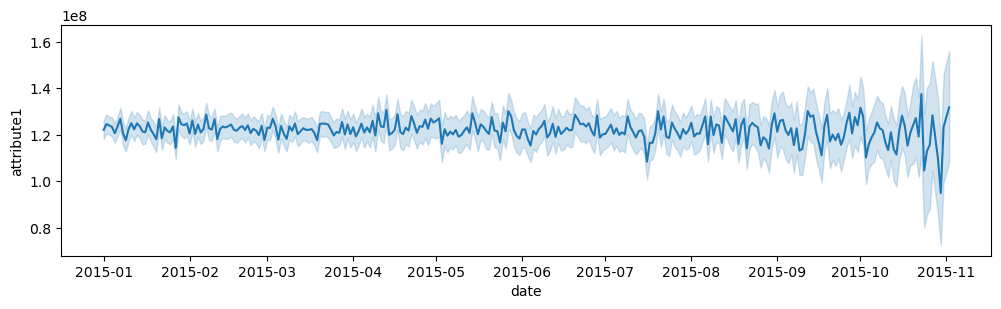

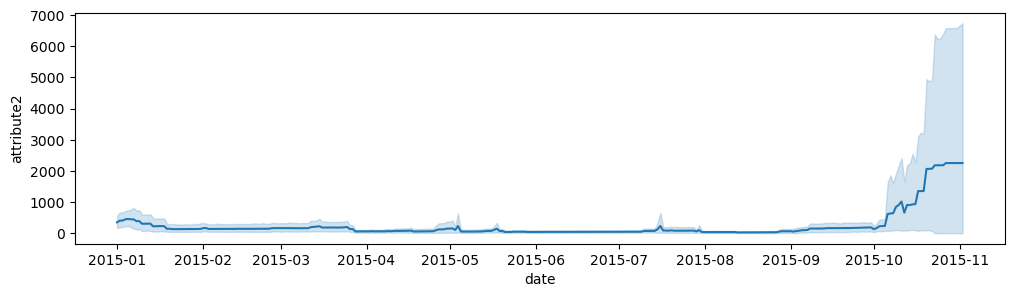

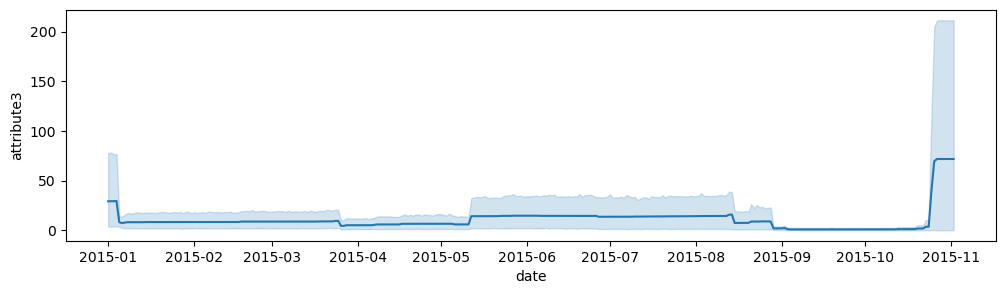

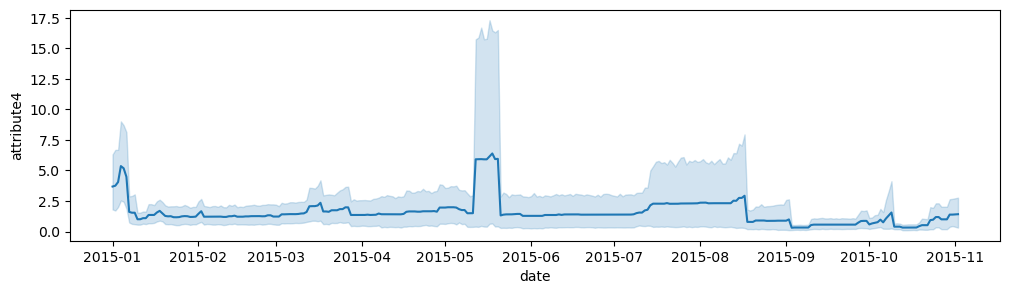

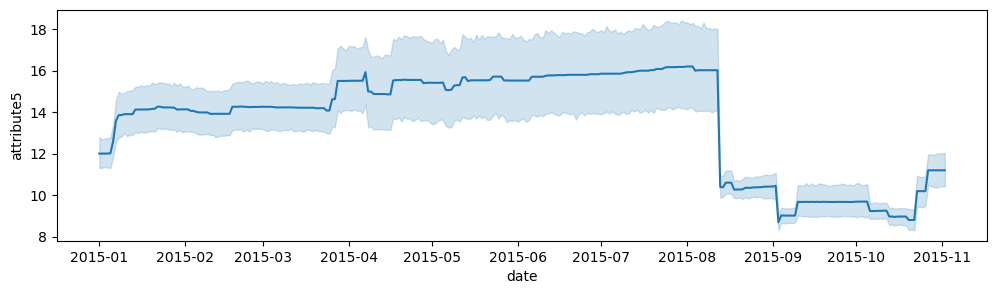

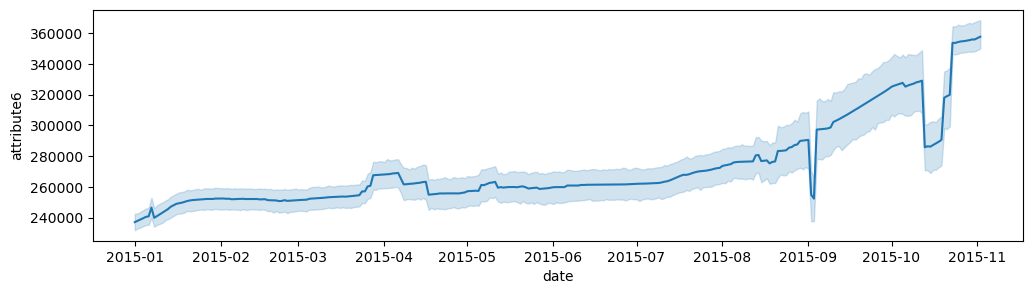

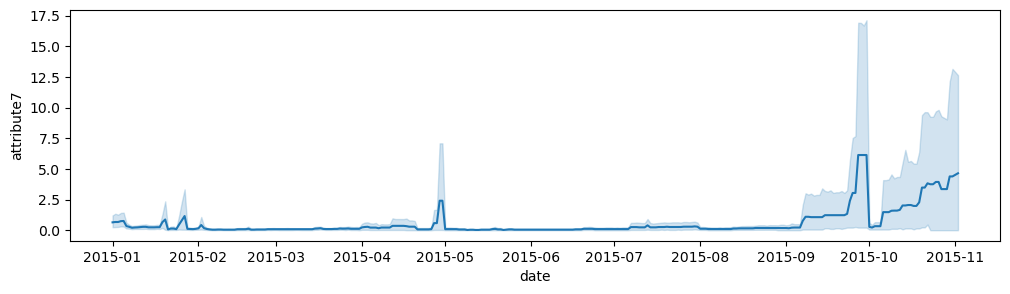

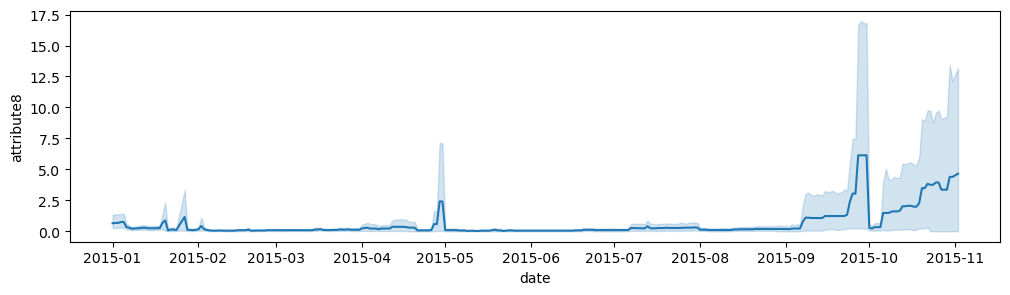

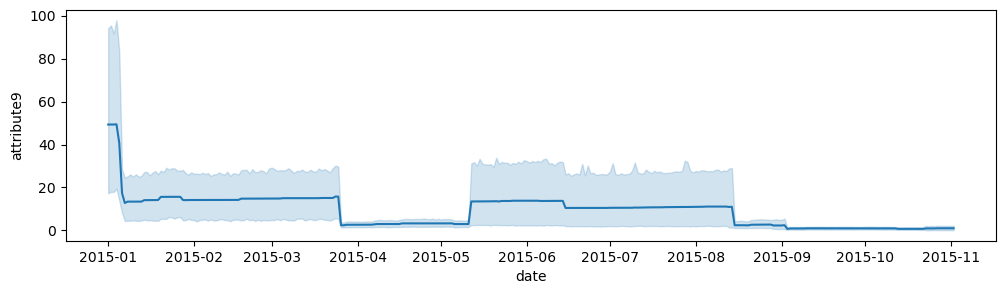

In [16]:
# Visualizar o comportamento de cada atributo ao longo do tempo
# Lineplot agrega valores repetidos e mostra a média e o intervalo de confiança

for col in attributes:

    plt.figure(figsize=(12, 3))

    sns.lineplot(data=df, x=df.index, y=col)

    plt.show()

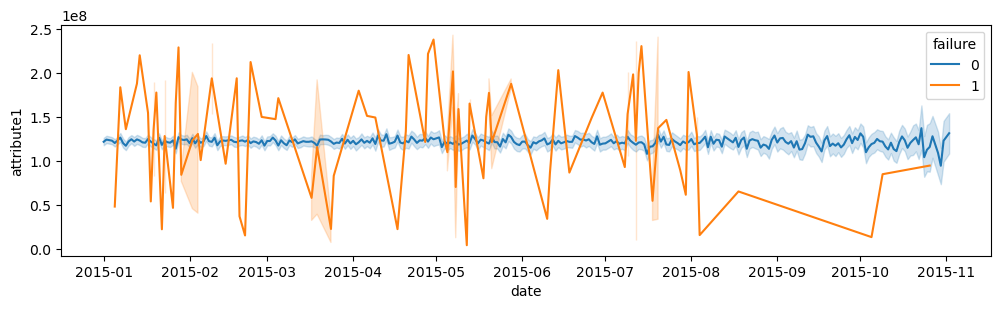

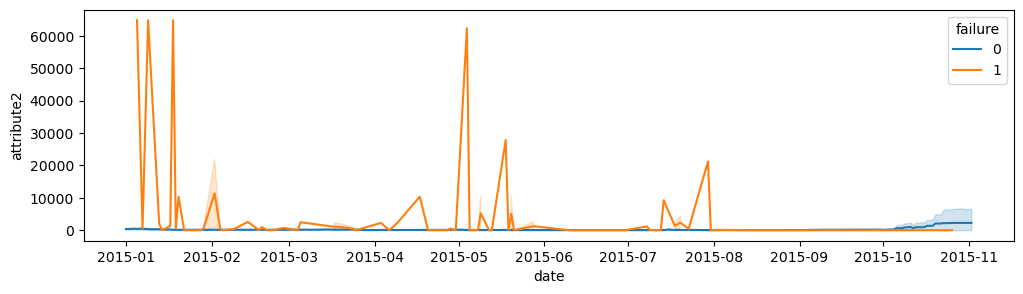

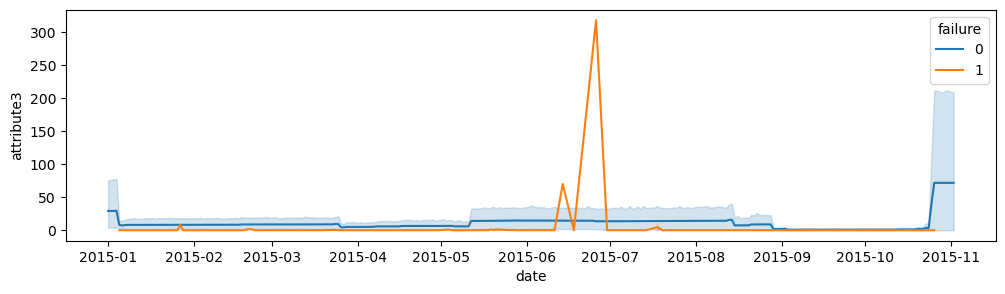

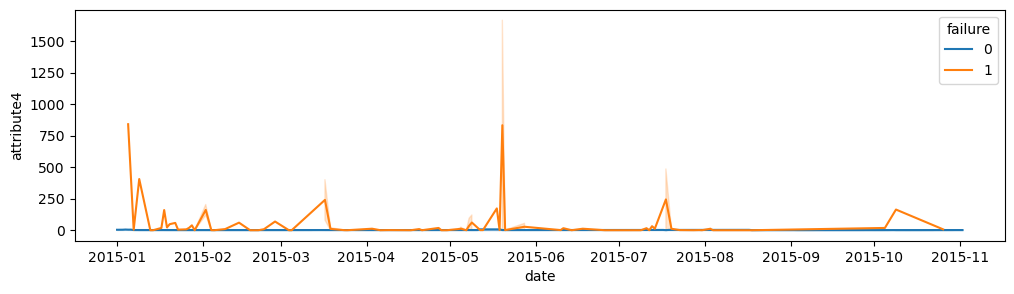

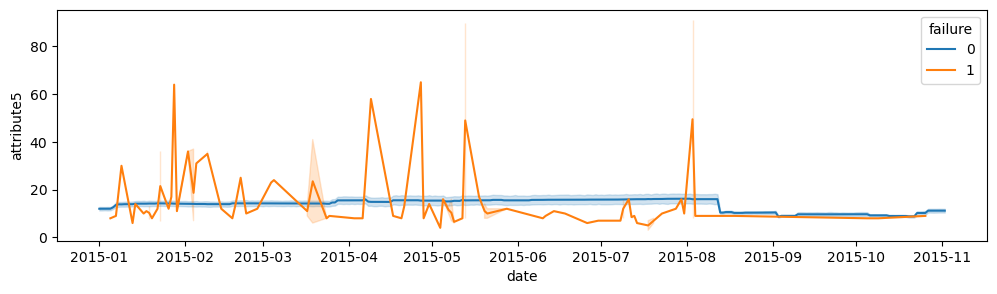

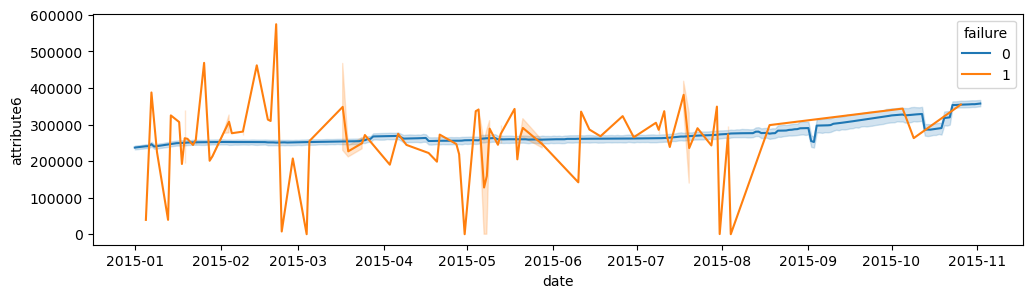

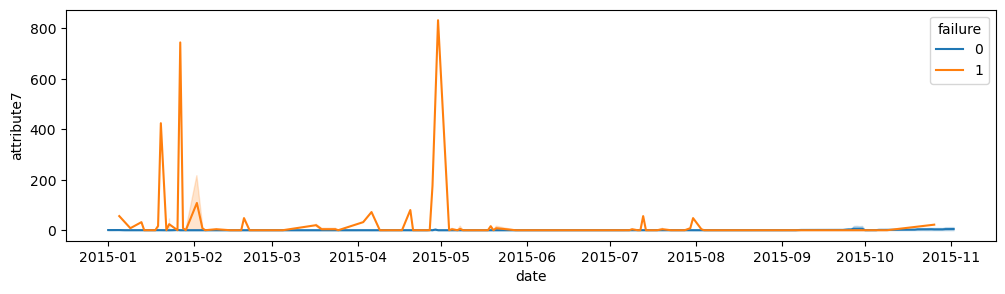

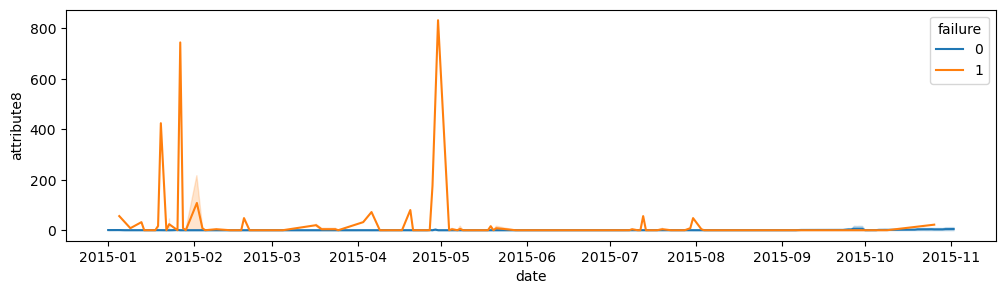

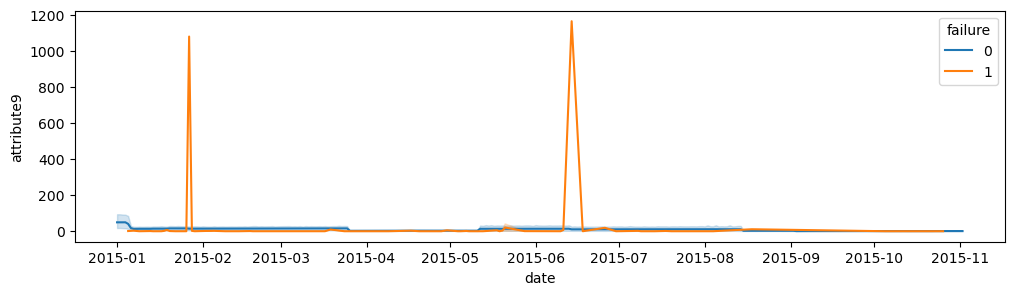

In [17]:
# Adicionando o target como parâmetro hue

for col in attributes:

    plt.figure(figsize=(12, 3))

    sns.lineplot(data=df, x=df.index, y=col, hue="failure")

    plt.show()

- Analisando os devices com as falhas

In [18]:
df['device'].nunique()

1169

In [20]:
df['device'].value_counts()

device
Z1F0QLC1    304
S1F0KYCR    304
S1F0E9EP    304
S1F0EGMT    304
S1F0FGBQ    304
           ... 
W1F1CHZK      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: count, Length: 1169, dtype: int64

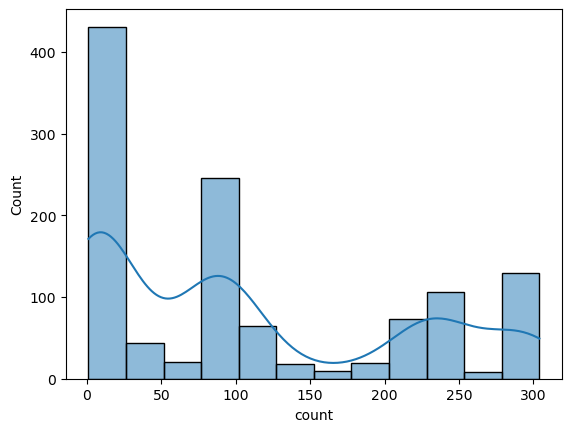

In [38]:
sns.histplot(df['device'].value_counts(), kde=True)

Aparentemente apenas alguns devices o registro de  falha

In [25]:
group_device_mean_failure = df.groupby(['device'])[['failure']].mean()

In [30]:
# Devices que não apresentaram nenhuma falha

group_device_mean_failure[group_device_mean_failure['failure'] ==
                          0].shape[0] / group_device_mean_failure.shape[0]

0.9093242087254063

In [31]:
# Devices que só apresentaram falha

group_device_mean_failure[group_device_mean_failure['failure'] ==
                          1].shape[0] / group_device_mean_failure.shape[0]

0.0

In [34]:
# Devices que não apresentaram falhas mas que também apresentaram (ambos, falha e não falha)

group_device_mean_failure[~(group_device_mean_failure['failure'].isin([0, 1])
                            )].shape[0] / group_device_mean_failure.shape[0]

0.09067579127459367

Então não dá para tratar os devices separadamente.

***Este não é um problema de série temporal no sentido de que exige um modelo autorregressivo ou de sequência.***

Em vez disso, formularemos o problema como uma tarefa de classificação.

No entanto, faremos uma validação fora do tempo (out-of-time validation), dada a dimensão temporal (ordem cronológica dos dados)

## Pré processamento dos dados

In [39]:
# Selecionando as features e target do problema

X = df[attributes]
y = df['failure']

Particionando os dados (de forma manual, sem usar o scikit-learn

In [40]:
train_perc = 0.7
split_index = int(train_perc * X.shape[0])

end_date_train = X.index[split_index]

# começando o test na data seguinte
unique_days = X.index.unique().tolist()
start_date_test = unique_days[unique_days.index(end_date_train) + 1]

end_date_train, start_date_test

(Timestamp('2015-05-30 00:00:00'), Timestamp('2015-05-31 00:00:00'))

In [41]:
X_train, X_test = X.loc[:end_date_train], X.loc[start_date_test:]
y_train, y_test = y.loc[:end_date_train], y.loc[start_date_test:]

In [42]:
X_train.index.min(), X_train.index.max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-05-30 00:00:00'))

In [43]:
X_test.index.min(), X_test.index.max()

(Timestamp('2015-05-31 00:00:00'), Timestamp('2015-11-02 00:00:00'))

In [44]:
# ajustando a proporção, deve ser aproximadamente 70/30

X_train.shape[0] / X.shape[0], X_test.shape[0] / X.shape[0]

(0.7017181688930302, 0.2982818311069699)

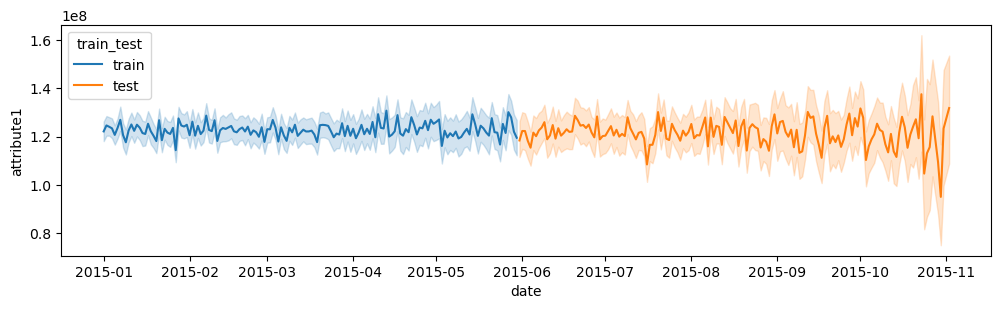

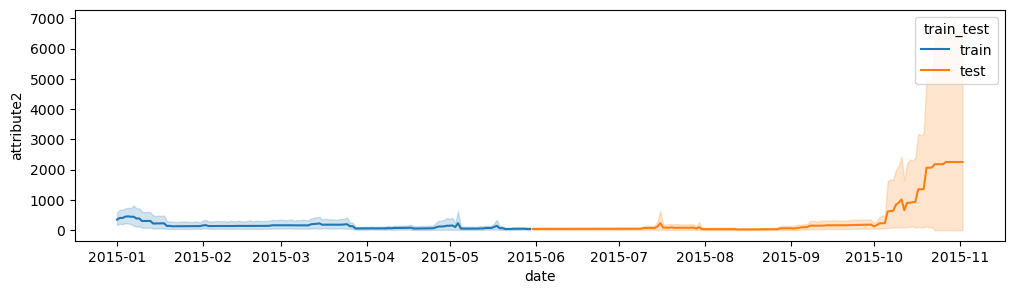

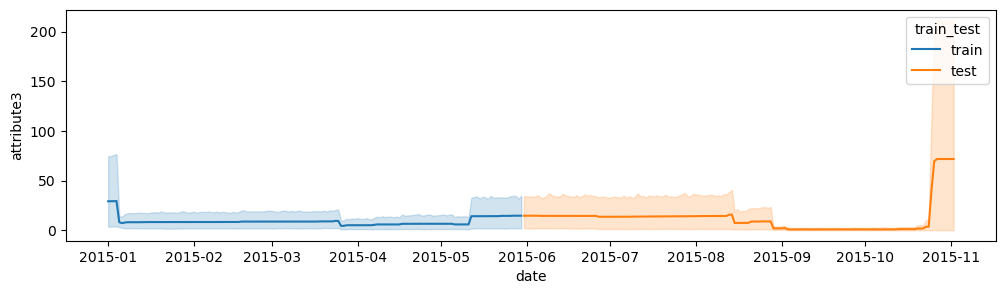

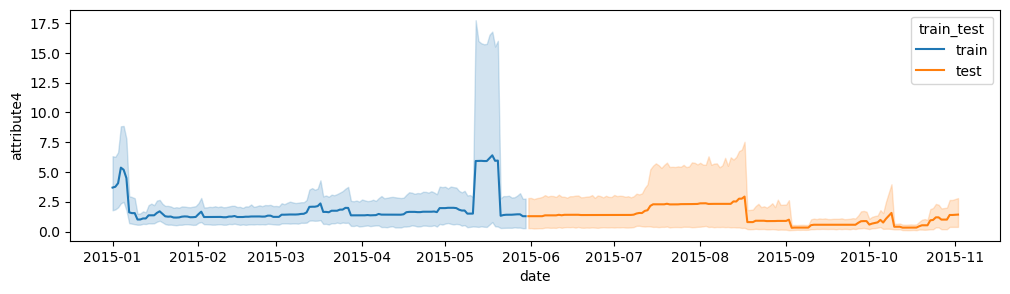

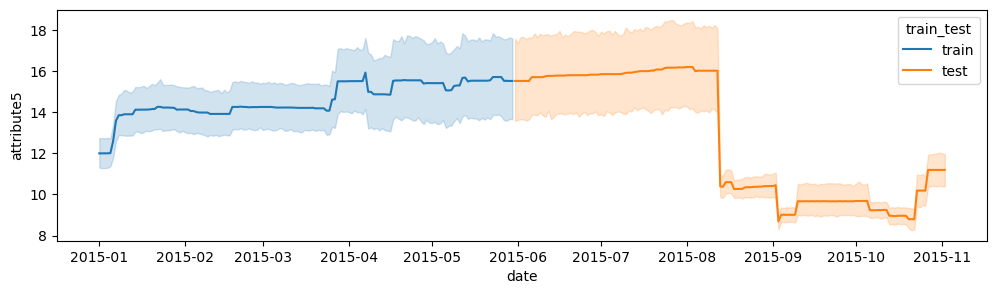

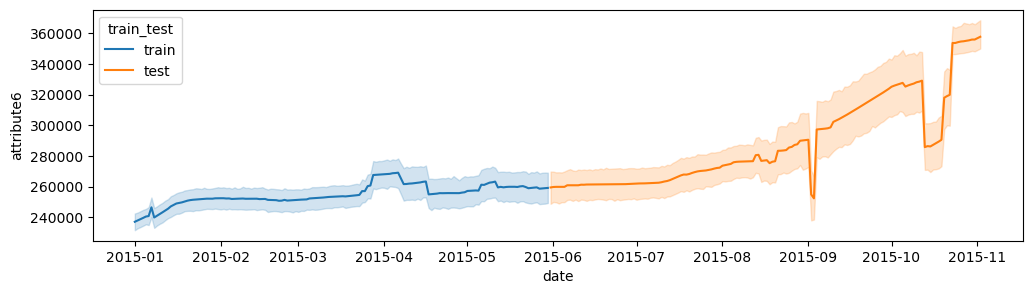

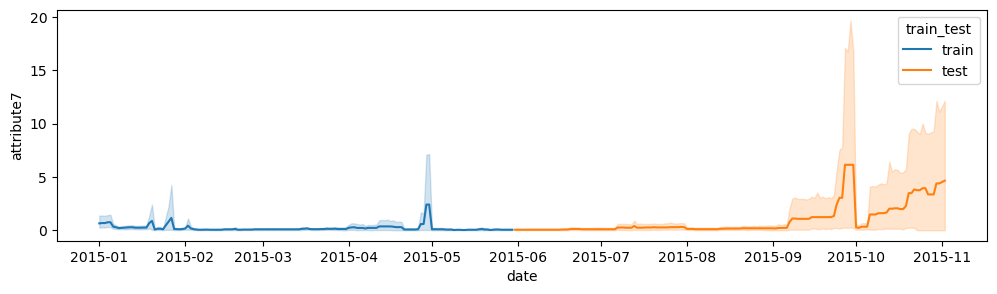

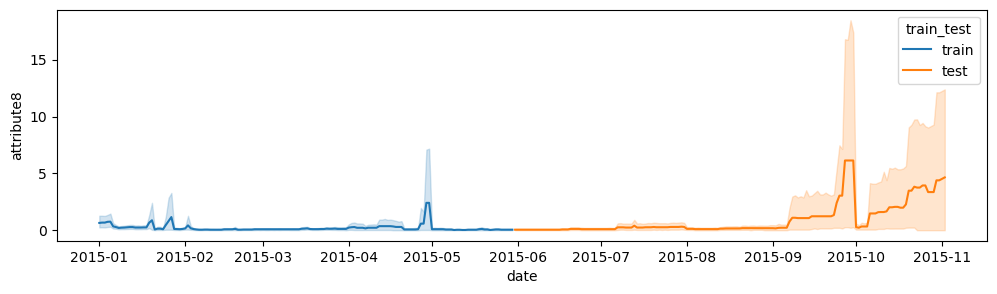

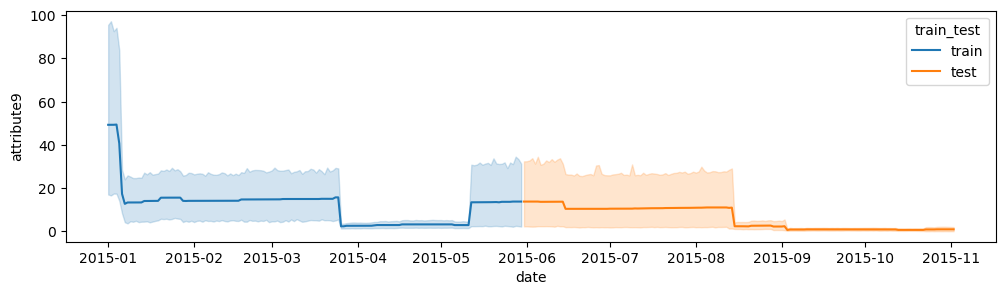

In [45]:
# Visualizando o split treino e teste

aux = df.copy()
aux.loc[:end_date_train, "train_test"] = "train"
aux.loc[start_date_test:, "train_test"] = "test"

for col in attributes:
    
    plt.figure(figsize=(12, 3))
    
    sns.lineplot(data=aux, x=aux.index, y=col, hue="train_test")
    
    plt.show()

É estranho que a divisão entre treino e teste seja, em quantidade de observações, 70/30, mas no tempo é metade/metade do ano: veja, 70% dos dados vão de janeiro até o final de maio - isso significa que na segunda metade do ano há menos dados. Portanto, é apropriado usá-lo como teste.

## Criação, desenvolvimento  e avaliação do modelo

In [47]:
# Funções de avaliação do modelo de classificação mantendo a ordem cronológica

def calc_f1_score(p, r):
    
    return 2/((1/p) + (1/r))

def plot_prec_rec_f1_curve(y_real, proba, pos_label=None):

    precisions, recalls, cutoffs = precision_recall_curve(y_real, proba, pos_label=pos_label)
    
    f1_scores = calc_f1_score(precisions[:-1], recalls[:-1])
    
    plt.title("Precision-recall tradeoff")

    plt.plot(cutoffs, precisions[:-1], label="precision")
    plt.plot(cutoffs, recalls[:-1], label="recall")
    plt.plot(cutoffs, f1_scores, label="f1 score")

    plt.xlabel("Cutoffs")

    plt.legend()
    plt.show()
    
def clf_metrics(modelo, X, y, cutoff=0.5, label_metrica="", 
                print_plot=True, plot_conf_matrix=True, print_cr=True,
                plot_prc=False, plot_roc=False, pos_label=None):
    
    classes = modelo.classes_
    n_classes = len(classes)
    
    if n_classes == 2:

        classes = modelo.classes_.tolist()

        idx_classe_positiva = classes.index(pos_label)

        probas = modelo.predict_proba(X)[:, idx_classe_positiva]

        classes.remove(pos_label)

        y_pred = np.where(probas >= cutoff, pos_label, classes[0])
    
    else:
        probas_all = modelo.predict_proba(X)
        y_pred = classes[probas_all.argmax(axis=1)]
        
    if print_plot:
        
        if n_classes == 2:
            print(f"{label_metrica} metrics - cutoff = {cutoff:.2f}")
        
        else:
            print(f"{label_metrica} metrics")
            
        if plot_conf_matrix:
            f,ax = plt.subplots(1,1,figsize=(4,4))
            ConfusionMatrixDisplay.from_predictions(y, y_pred, ax=ax)
            plt.show()
    
        if print_cr:
            print(classification_report(y, y_pred))
        
        if n_classes == 2:
            
            if plot_prc or plot_roc:
                print("="*80)
                print("cutoff-varying metrics".center(80))
                print(f"positive class: {pos_label}".center(80))
                print("="*80)

            if plot_prc:
                f,ax = plt.subplots(1,1,figsize=(4,4))
                PrecisionRecallDisplay.from_predictions(y, probas, pos_label=pos_label, ax=ax)
                plt.show()

                plot_prec_rec_f1_curve(y, probas, pos_label=pos_label)

            if plot_roc:
                f,ax = plt.subplots(1,1,figsize=(4,4))
                disp = RocCurveDisplay.from_predictions(y, probas, pos_label=pos_label, ax=ax)
                disp.ax_.set_title(f"AUC: {roc_auc_score(y, probas):.3f}", fontsize=16)

                x = np.linspace(0, 1, 2)
                plt.plot(x, x, color="k", ls=":")

                plt.show()
    
    return classification_report(y, y_pred, output_dict=True)

def clf_metrics_train_test(modelo, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           print_plot=True, plot_conf_matrix=True, print_cr=True,
                           plot_prc=False, plot_roc=False, pos_label=None):

    cr_train = clf_metrics(modelo, X_train, y_train, cutoff=cutoff, label_metrica="train", 
                           print_plot=print_plot, plot_conf_matrix=plot_conf_matrix, print_cr=print_cr,
                           plot_prc=plot_prc, plot_roc=plot_roc, pos_label=pos_label)

    print()
    print("#"*80)
    print()

    cr_test = clf_metrics(modelo, X_test, y_test, cutoff=cutoff, label_metrica="test", 
                          print_plot=print_plot, plot_conf_matrix=plot_conf_matrix, print_cr=print_cr,
                          plot_prc=plot_prc, plot_roc=plot_roc, pos_label=pos_label)
    
    return cr_train, cr_test

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

É importante analisar dados de treino e dados de teste para evitar overfitting

#### Regressão logística

train metrics - cutoff = 0.50


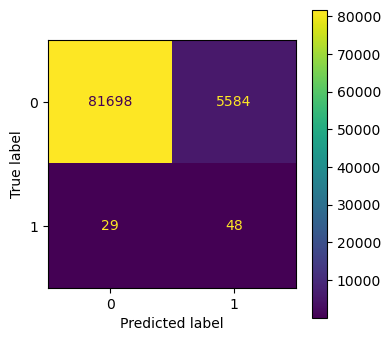

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     87282
           1       0.01      0.62      0.02        77

    accuracy                           0.94     87359
   macro avg       0.50      0.78      0.49     87359
weighted avg       1.00      0.94      0.97     87359

                             cutoff-varying metrics                             
                               positive class: 1                                


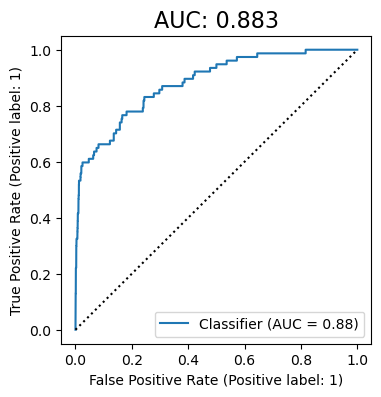


################################################################################

test metrics - cutoff = 0.50


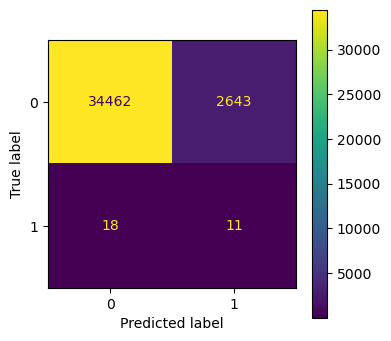

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     37105
           1       0.00      0.38      0.01        29

    accuracy                           0.93     37134
   macro avg       0.50      0.65      0.49     37134
weighted avg       1.00      0.93      0.96     37134

                             cutoff-varying metrics                             
                               positive class: 1                                


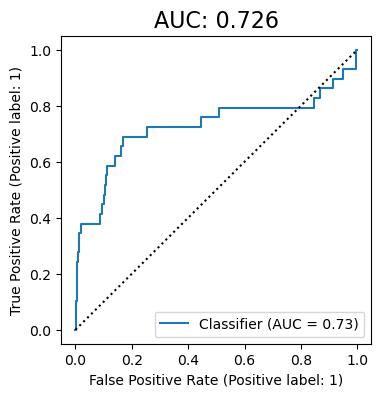

In [48]:
from sklearn.linear_model import LogisticRegression

logit_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", LogisticRegression(class_weight="balanced"))
]).fit(X_train, y_train)

_ = clf_metrics_train_test(
    logit_pipe, X_train, y_train, X_test, y_test, cutoff=0.5,
    print_plot=True, plot_conf_matrix=True, print_cr=True,
    plot_prc=False, plot_roc=True, pos_label=1
)

#### Gradient Boosting

train metrics - cutoff = 0.50


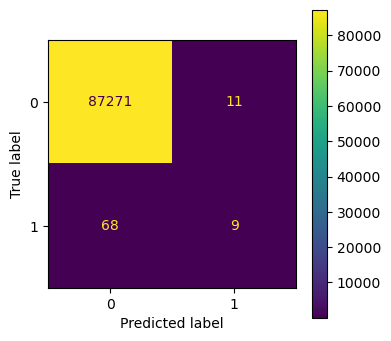

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87282
           1       0.45      0.12      0.19        77

    accuracy                           1.00     87359
   macro avg       0.72      0.56      0.59     87359
weighted avg       1.00      1.00      1.00     87359

                             cutoff-varying metrics                             
                               positive class: 1                                


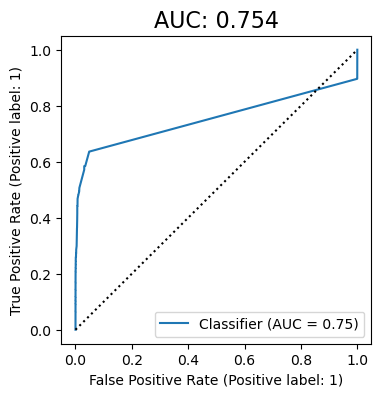


################################################################################

test metrics - cutoff = 0.50


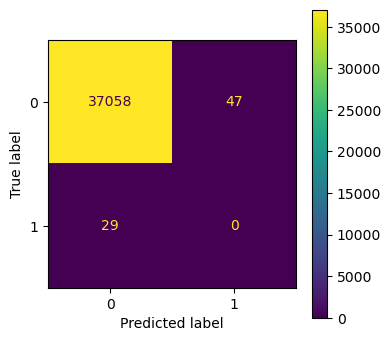

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37105
           1       0.00      0.00      0.00        29

    accuracy                           1.00     37134
   macro avg       0.50      0.50      0.50     37134
weighted avg       1.00      1.00      1.00     37134

                             cutoff-varying metrics                             
                               positive class: 1                                


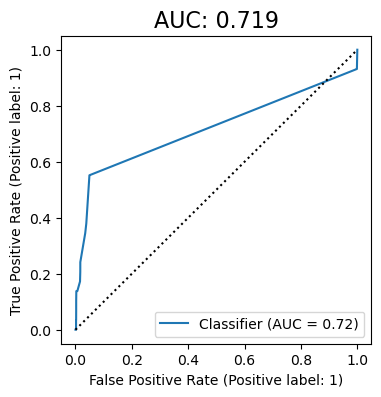

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("gb", GradientBoostingClassifier())
]).fit(X_train, y_train)

_ = clf_metrics_train_test(
    gb_pipe, X_train, y_train, X_test, y_test, cutoff=0.5, 
    print_plot=True, plot_conf_matrix=True, print_cr=True,
    plot_prc=False, plot_roc=True, pos_label=1
)

#### Adaboost

train metrics - cutoff = 0.50


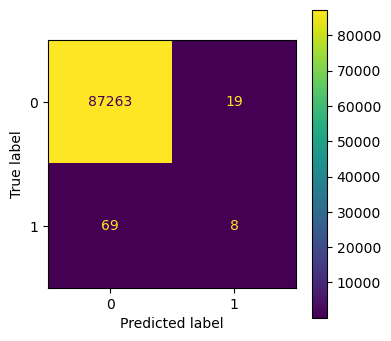

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87282
           1       0.30      0.10      0.15        77

    accuracy                           1.00     87359
   macro avg       0.65      0.55      0.58     87359
weighted avg       1.00      1.00      1.00     87359

                             cutoff-varying metrics                             
                               positive class: 1                                


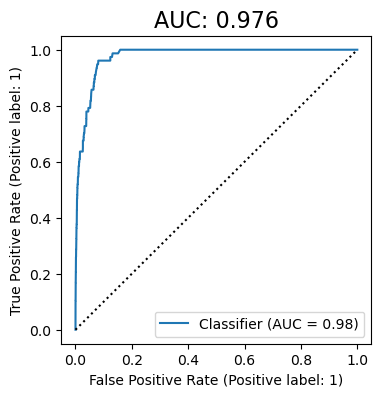


################################################################################

test metrics - cutoff = 0.50


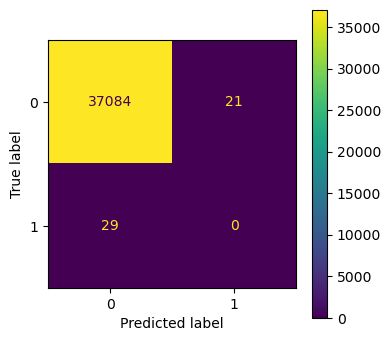

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37105
           1       0.00      0.00      0.00        29

    accuracy                           1.00     37134
   macro avg       0.50      0.50      0.50     37134
weighted avg       1.00      1.00      1.00     37134

                             cutoff-varying metrics                             
                               positive class: 1                                


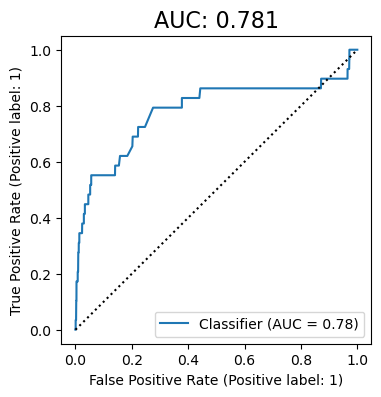

In [50]:
from sklearn.ensemble import AdaBoostClassifier

ada_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ada", AdaBoostClassifier())
]).fit(X_train, y_train)

_ = clf_metrics_train_test(
    ada_pipe, X_train, y_train, X_test, y_test, cutoff=0.5, 
    print_plot=True, plot_conf_matrix=True, print_cr=True,
    plot_prc=False, plot_roc=True, pos_label=1
)

#### LGBM

[LightGBM] [Info] Number of positive: 77, number of negative: 87282
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 87359, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
train metrics - cutoff = 0.50


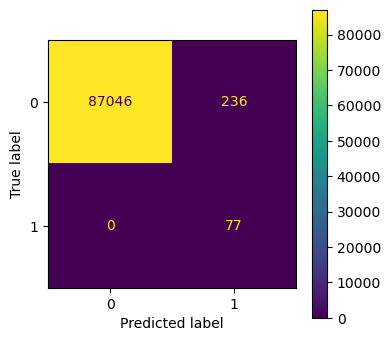

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87282
           1       0.25      1.00      0.39        77

    accuracy                           1.00     87359
   macro avg       0.62      1.00      0.70     87359
weighted avg       1.00      1.00      1.00     87359

                             cutoff-varying metrics                             
                               positive class: 1                                


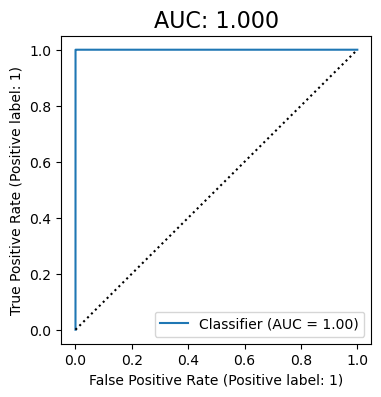


################################################################################

test metrics - cutoff = 0.50


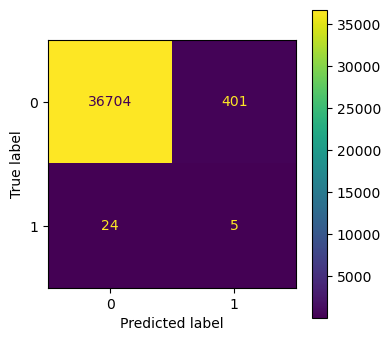

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     37105
           1       0.01      0.17      0.02        29

    accuracy                           0.99     37134
   macro avg       0.51      0.58      0.51     37134
weighted avg       1.00      0.99      0.99     37134

                             cutoff-varying metrics                             
                               positive class: 1                                


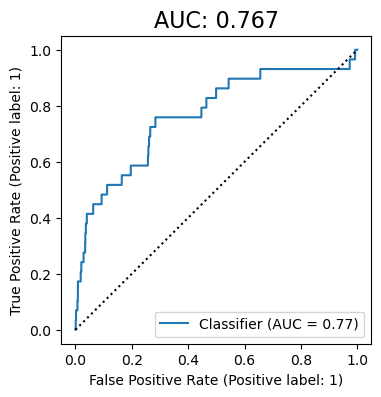

In [52]:
from lightgbm import LGBMClassifier

lgbm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lgbm", LGBMClassifier(class_weight="balanced"))  # colocando peso nas classes 
]).fit(X_train, y_train)

_ = clf_metrics_train_test(
    lgbm_pipe, X_train, y_train, X_test, y_test, cutoff=0.5, 
    print_plot=True, plot_conf_matrix=True, print_cr=True,
    plot_prc=False, plot_roc=True, pos_label=1
)

As avaliações foram bem ruins devido o desequilibrio das classes do target.

Para melhorar o balanceamento, existem algumas técnicas:

- Subamostragem (Undersampling):
    - Random undersampling, cluster centroids
- Sobreamostragem (Oversampling):
    - Random oversampling, SMOTE
- Geração de Peso (Weighting):
    - Acabamos de fazer no LGBM e na regressão logística
- Entre outras com combinação de técnicas, métodos híbridos, dados sintéticos, etc.

**Usando o Random undersampling**

In [56]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#### Regressão Logística

train metrics - cutoff = 0.50


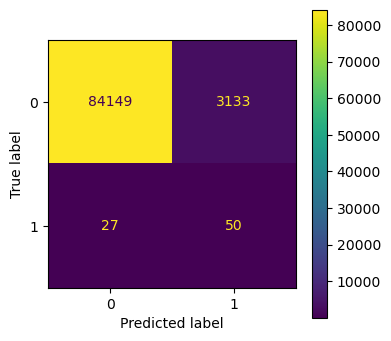

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     87282
           1       0.02      0.65      0.03        77

    accuracy                           0.96     87359
   macro avg       0.51      0.81      0.51     87359
weighted avg       1.00      0.96      0.98     87359

                             cutoff-varying metrics                             
                               positive class: 1                                


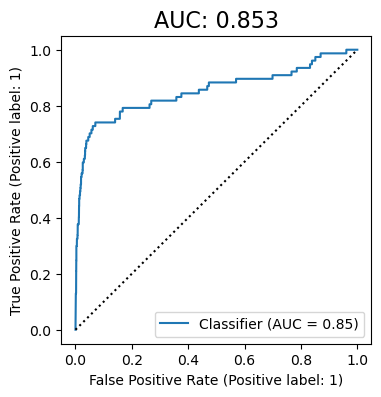


################################################################################

test metrics - cutoff = 0.50


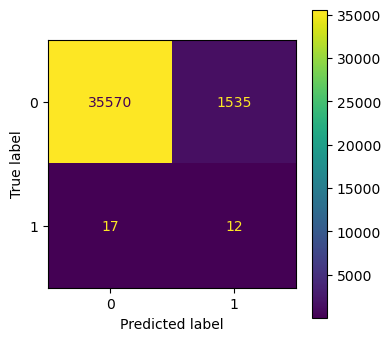

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     37105
           1       0.01      0.41      0.02        29

    accuracy                           0.96     37134
   macro avg       0.50      0.69      0.50     37134
weighted avg       1.00      0.96      0.98     37134

                             cutoff-varying metrics                             
                               positive class: 1                                


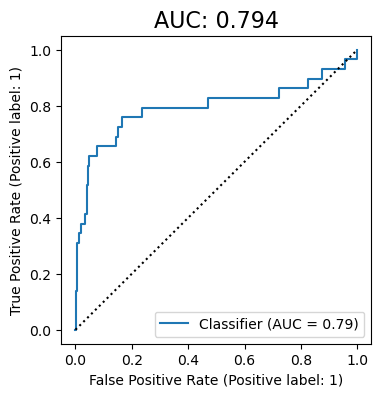

In [57]:
from sklearn.linear_model import LogisticRegression

logit_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("us", RandomUnderSampler()),
    ("logit", LogisticRegression())
]).fit(X_train, y_train)

_ = clf_metrics_train_test(
    logit_pipe, X_train, y_train, X_test, y_test, cutoff=0.5, 
    print_plot=True, plot_conf_matrix=True, print_cr=True,
    plot_prc=False, plot_roc=True, pos_label=1
)

#### AdaBoost

train metrics - cutoff = 0.50


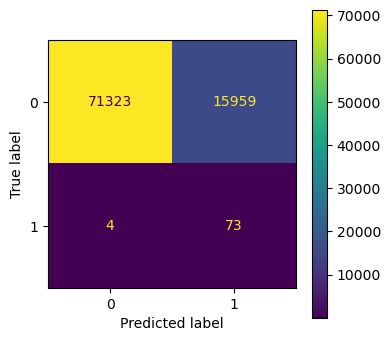

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     87282
           1       0.00      0.95      0.01        77

    accuracy                           0.82     87359
   macro avg       0.50      0.88      0.45     87359
weighted avg       1.00      0.82      0.90     87359

                             cutoff-varying metrics                             
                               positive class: 1                                


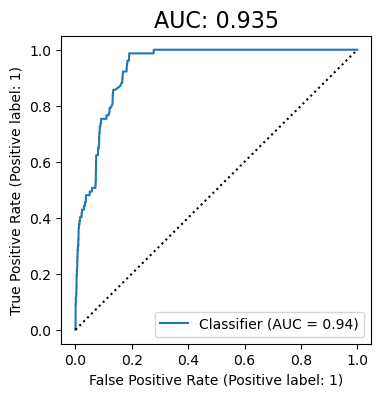


################################################################################

test metrics - cutoff = 0.50


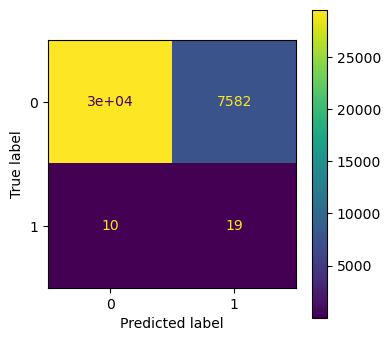

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     37105
           1       0.00      0.66      0.00        29

    accuracy                           0.80     37134
   macro avg       0.50      0.73      0.45     37134
weighted avg       1.00      0.80      0.89     37134

                             cutoff-varying metrics                             
                               positive class: 1                                


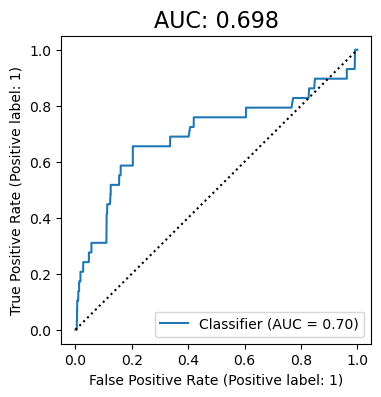

In [58]:
from sklearn.ensemble import AdaBoostClassifier

ada_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("us", RandomUnderSampler()),
    ("ada", AdaBoostClassifier())
]).fit(X_train, y_train)

_ = clf_metrics_train_test(
    ada_pipe, X_train, y_train, X_test, y_test, cutoff=0.5, 
    print_plot=True, plot_conf_matrix=True, print_cr=True,
    plot_prc=False, plot_roc=True, pos_label=1
)

#### LGBM

[LightGBM] [Info] Number of positive: 77, number of negative: 77
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 154, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

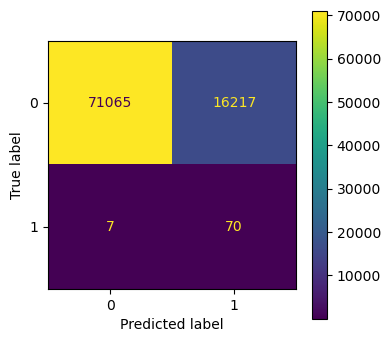

              precision    recall  f1-score   support

           0       1.00      0.81      0.90     87282
           1       0.00      0.91      0.01        77

    accuracy                           0.81     87359
   macro avg       0.50      0.86      0.45     87359
weighted avg       1.00      0.81      0.90     87359

                             cutoff-varying metrics                             
                               positive class: 1                                


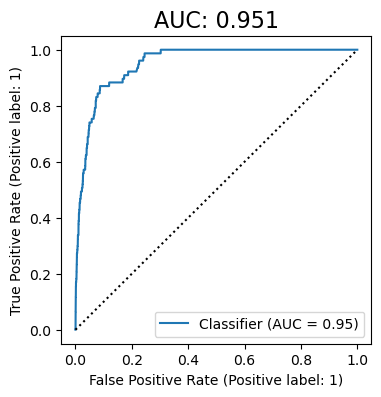


################################################################################

test metrics - cutoff = 0.50


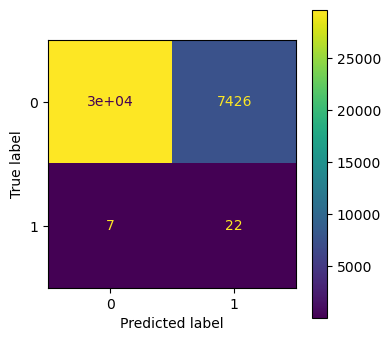

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     37105
           1       0.00      0.76      0.01        29

    accuracy                           0.80     37134
   macro avg       0.50      0.78      0.45     37134
weighted avg       1.00      0.80      0.89     37134

                             cutoff-varying metrics                             
                               positive class: 1                                


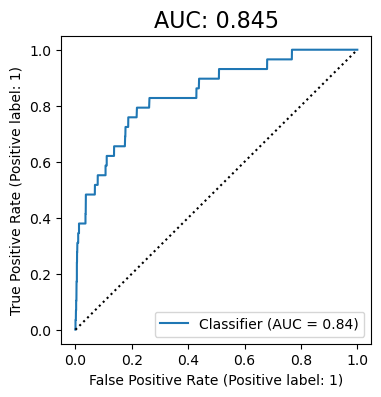

In [59]:
from lightgbm import LGBMClassifier

lgbm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("us", RandomUnderSampler()),
    ("lgbm", LGBMClassifier())
]).fit(X_train, y_train)

_ = clf_metrics_train_test(
    lgbm_pipe, X_train, y_train, X_test, y_test, cutoff=0.5, 
    print_plot=True, plot_conf_matrix=True, print_cr=True,
    plot_prc=False, plot_roc=True, pos_label=1
)

Ainda não chegamos em uma avaliação boa

# Próximos passos

- Otimização de hiperparâmetros e seleção de modelo 
    - Tentar ferramentas de automl como pycarret
- otimização de cutoof?
- mudar estratégia de undersampling?